In [57]:
import pandas as pd

# Load dataset (update path as needed)
df = pd.read_csv('archive/german_credit_data.csv')  # File name may vary

# Initial exploration
print(df.head())



   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [61]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [63]:

df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
print(df.isnull().sum())

# Fill missing categorical values with "unknown"
df.fillna({'Saving accounts': 'unknown', 'Checking account': 'unknown'}, inplace=True)

# One-Hot Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)  # avoid multicollinearity

# Define features and target
# Let's assume "good" and "bad" credit is encoded in a column — you might have to manually add it.
# If not present, you can simulate it: (e.g., if Credit amount > threshold or use Job, Duration, etc.)
# For now, let's create a dummy risk column to proceed
df['Risk'] = (df['Credit amount'] < 3000).astype(int)  # Dummy target: 1 = good, 0 = bad

X = df.drop('Risk', axis=1)
y = df['Risk']


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [65]:
df.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,67,2,1169,6,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,22,2,5951,48,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,49,1,2096,12,True,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,1
3,45,2,7882,42,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
4,53,2,4870,24,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0


In [67]:
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,49,1,2096,12,True,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,45,2,7882,42,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
996,40,3,3857,30,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
997,38,2,804,12,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
998,23,2,1845,45,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
y

0      1
1      0
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    0
Name: Risk, Length: 1000, dtype: int32

In [79]:
# modelTraining.py

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import joblib




# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Save the column structure
joblib.dump(X_encoded.columns, "model_columns.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, "credit_model.pkl")
print("✅ Model and column structure saved!")


[[ 70   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       130

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

✅ Model and column structure saved!


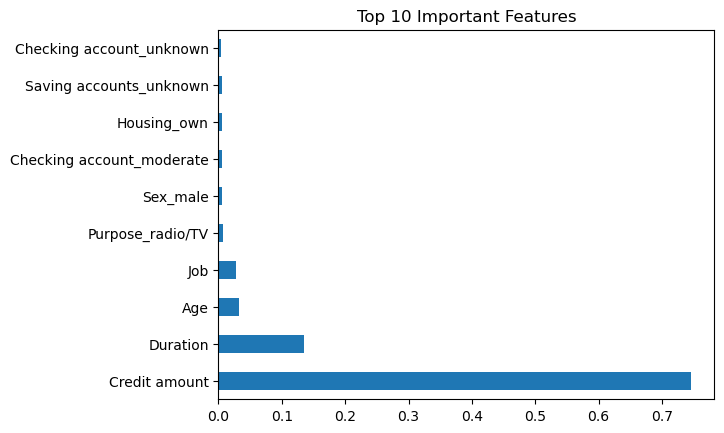

ModuleNotFoundError: No module named 'shap'

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# SHAP for deeper model explainability
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)  # class 1 = good credit risk


In [51]:
import streamlit as st
import numpy as np

st.title("Credit Risk Predictor")

# Example inputs (you can expand with all features)
duration = st.slider("Duration (months)", 4, 72)
credit_amount = st.number_input("Credit Amount")
age = st.slider("Age", 18, 75)

# Derived feature
credit_per_month = credit_amount / duration

if st.button("Predict"):
    input_data = np.array([[duration, credit_amount, age, credit_per_month]])
    prediction = model.predict(input_data)[0]
    st.success("Good Credit Risk" if prediction == 1 else "Bad Credit Risk")


2025-04-24 08:12:32.751 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-24 08:12:32.755 Session state does not function when running a script without `streamlit run`
